In [1]:
import os, json, io, nltk, re
from collections import Counter 
from dataclasses import dataclass
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

In [2]:
path_to_folder = "C:/Users/monte/_Olesya/Диплом/Основная папка/задание/Distances_between_articles_cat_NLP"
categ = json.load(open("C:/Users/monte/_Olesya/Диплом/Основная папка/задание/NatLangProc_Categ.json", "r", encoding="utf-8"))

In [3]:
@dataclass
class dist_to_root_art:
    idx: int
    art_name: str    
    distance: float
        
def my_comp_distance(x):
    return x.distance

In [4]:
def art_sum_dist (name):
    art_dict = json.load(open(path_to_folder + "/" + name + ".json", "r", encoding="utf-8"))
    sum_list = []
    for i in art_dict:
        sum_el = 0
        for j in art_dict[i]["distances"]:
            sum_el += art_dict[i]["distances"][j]["distance"]
        c = []
        c = [i, art_dict[i]["art_name"], sum_el]
        sum_list.append(c)
    return sum_list


def main_art (name):
    return categ[name][2]

In [5]:
def print_cat_dist_density (name, name_json):
    art_and_sum_table = pd.DataFrame(art_sum_dist(name_json), columns = ['Index_in_cat', 'Name_of_art', 'Sum_of_coef'])
    
    sns.kdeplot(art_and_sum_table,fill = True)
    plt.title('График плотности распределения Natural language processing')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')

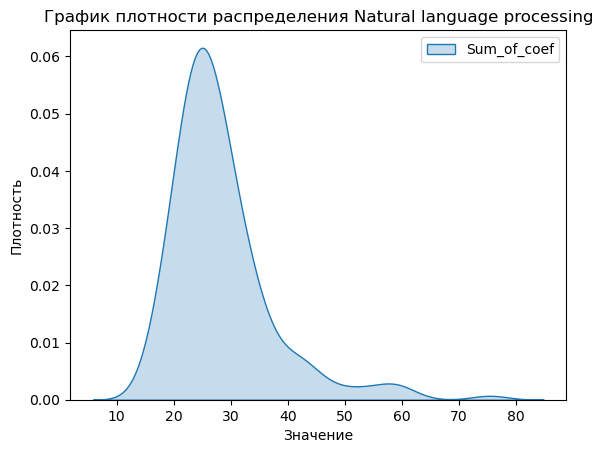

In [6]:
print_cat_dist_density("Natural language processing", "NLP_distances_result")

In [11]:
def print_cat_dist_density_angle (name, name_json):
    art_and_sum_table = pd.DataFrame(art_sum_dist(name_json), columns = ['Index_in_cat', 'Name_of_art', 'Sum_of_coef'])
    val = art_and_sum_table['Sum_of_coef'].values
    kde = gaussian_kde(val)
    
    x = np.linspace(min(val), max(val), 1000)
    
    density = kde(x)
    density_derivative = np.gradient(density, x)
    
    target_slope = -1
    difference = np.abs(density_derivative - target_slope)
    index_of_target = np.argmin(difference)
    x_at_target_slope = x[index_of_target]
    
    plt.plot(x, density, label="Плотность")
    plt.axvline(x_at_target_slope, color='r', linestyle='--', label=f'Точка с наклоном 45°: {x_at_target_slope:.2f}')
    plt.title('График плотности распределения - Natural language processing')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()
    
    print(f'Точка, где наклон равен -45 градусам (производная = -1): {x_at_target_slope:.2f}')

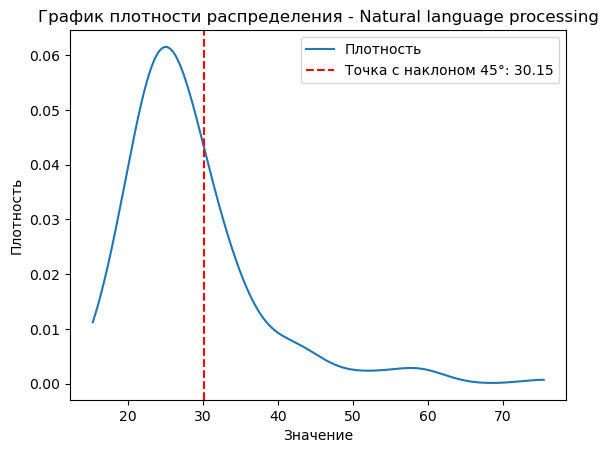

Точка, где наклон равен -45 градусам (производная = -1): 30.15


In [12]:
print_cat_dist_density_angle("Natural language processing", "NLP_distances_result")